### Quiz Answers

In [1]:
import pandas as pd
df = pd.read_csv('./energydata_complete.csv')
df.head(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [8]:
## fitting model for x=T2 and y=T6

df =df.loc[:,['T2','T6']]

x = df['T2']
y =df['T6']

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

x=pd.Series(x).array
x=np.array(x).reshape((-1,1))
y=pd.Series(y).array


In [10]:
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print('R2: {:.2f}'.format(model.score(x,y)))

R2: 0.64


##### Some of the other calculations are found in the quiz dataset work below, 
however i didnt do all calculations related to lasso as it doesnt import in my system,keep saying import error.pls bear with me.

### Task-1: import and read to data

In [4]:
import pandas as pd
df = pd.read_csv('./energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Task-2: Data Exploration

In [5]:
df.shape

(19735, 29)

In [6]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

###### our data shows no missing value

In [7]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

 ###### now i intend to rename the columns for better understanding 

In [9]:
df = df.rename(columns={
    'T1':'kitchen_temp',
    'RH_1':'RH_kitchen',
    'T2':'room_temp',
    'RH_2':'RH_room',
    'T3':'laundry_temp',
    'RH_3':'RH_laundry',
    'T4':'office_temp',
    'RH_4':'RH_office',
    'T5':'bathroom_temp',
    'RH_5':'RH_bathroom',
    'T6':'outside_temp_hous',
    'RH_6':'RH_outside',
    'T7': 'ironing_room_temp',
    'RH_7':'RH_ironing_room',
    'T8':'teenager_room_temp',
    'RH_8':'RH_teenager_room',
    'T9':'parent_room_temp',
    'RH_9':'RH_parent_room',
    'T_out':'weather_temp',
    'RH_out':'weather_RH',
    'rv1':'random_variable_1',
    'rv2':'random_variable_2'

})

In [10]:
df.head()

,date,Appliances,lights,kitchen_temp,RH_kitchen,room_temp,RH_room,laundry_temp,RH_laundry,office_temp,...,parent_room_temp,RH_parent_room,weather_temp,Press_mm_hg,weather_RH,Windspeed,Visibility,Tdewpoint,random_variable_1,random_variable_2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


###### observation:
from our dataset description above focusing basically on our target variable for now,the following were observed, that the average energy used by apliances is 97.6Watt. And the least energy used is 10-Wat, with maximum energy used as 1080-Watt

###### Now i intend to seperate my dataset into input and output variables so i can run seperate analysis

In [11]:
feature_var= df.iloc[:,2:]

target_var =df.loc[:, ['Appliances']]

In [12]:
feature_var.head(2)        ### date was not included since this is not a time series task

,lights,kitchen_temp,RH_kitchen,room_temp,RH_room,laundry_temp,RH_laundry,office_temp,RH_office,bathroom_temp,...,parent_room_temp,RH_parent_room,weather_temp,Press_mm_hg,weather_RH,Windspeed,Visibility,Tdewpoint,random_variable_1,random_variable_2
0,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [13]:
target_var.head(2)

,Appliances
0,60
1,60


###### Now that my column attributes are well sorted ,i can statistically explore each of the columns

In [14]:
feature_var.describe()

,lights,kitchen_temp,RH_kitchen,room_temp,RH_room,laundry_temp,RH_laundry,office_temp,RH_office,bathroom_temp,...,parent_room_temp,RH_parent_room,weather_temp,Press_mm_hg,weather_RH,Windspeed,Visibility,Tdewpoint,random_variable_1,random_variable_2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


###### observation:
 Looking at the above table, we can see the different measurements of different unit for each category.
 
 1.The minimum temperature value registered -6, with the max as 30
 
 2.For the humidity bin,the minimum value recorded in percentage is 1 and the maximum value given as 100.
 

In [15]:
target_var.describe()

,Appliances
count,19735.000000
mean,97.694958
std,102.524891
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


###### Now i intend to use data visualization to explicitly study how the independent variables affect the output variable for more insight

### Task-3: Data Visualization

In [16]:
import numpy as np
import matplotlib as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

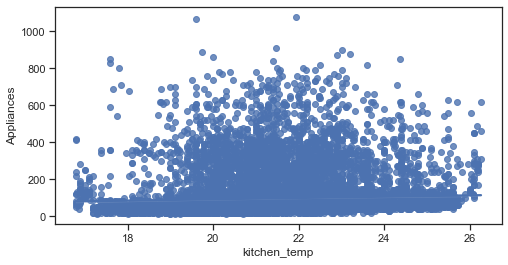

In [17]:
plt.figure(figsize =(8,4))
ax = sns.regplot(df['kitchen_temp'],df['Appliances'],fit_reg=True,data=df)
plt.show()

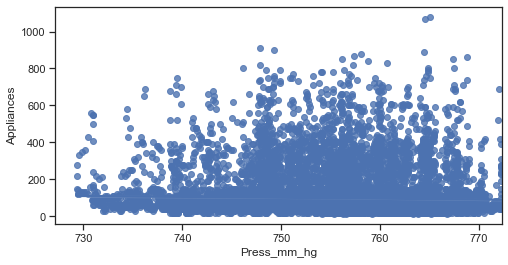

In [18]:
plt.figure(figsize =(8,4))
ax = sns.regplot(df['Press_mm_hg'],df['Appliances'],fit_reg=True,data=df)
plt.show()

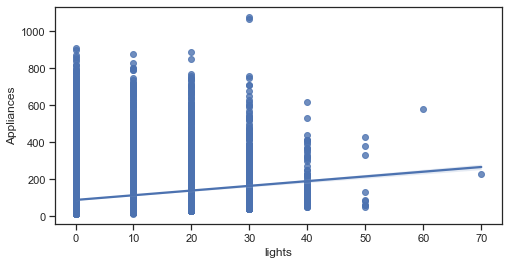

In [19]:
plt.figure(figsize =(8,4))
ax = sns.regplot(df['lights'],df['Appliances'],fit_reg=True,data=df)
plt.show()

###### observation: 
The above plot shows the light field is not a good predictor as the plot has many outliers and shows no clear relationship with the output variable

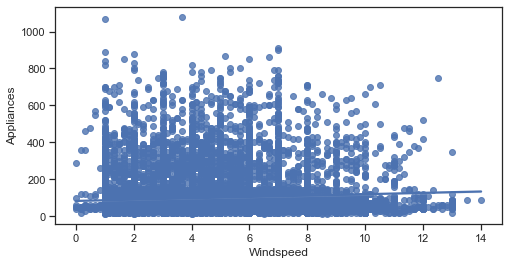

In [20]:
plt.figure(figsize =(8,4))
ax = sns.regplot(df['Windspeed'],df['Appliances'],data=df)
plt.show()

###### observation: 
The scatter plots shown above does not give a clear message whether the individual fields has a linear relationship with the output variable or not as they appear to be random,except for the light-variable which appear to be insignificant for prediction.I will then use heatmap to summerise the correlation of the entire feature sets 

In [21]:
feature_var.corr()


,lights,kitchen_temp,RH_kitchen,room_temp,RH_room,laundry_temp,RH_laundry,office_temp,RH_office,bathroom_temp,...,parent_room_temp,RH_parent_room,weather_temp,Press_mm_hg,weather_RH,Windspeed,Visibility,Tdewpoint,random_variable_1,random_variable_2
lights,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
kitchen_temp,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_kitchen,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
room_temp,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_room,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
laundry_temp,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_laundry,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
office_temp,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_office,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
bathroom_temp,-0.078745,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,...,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490


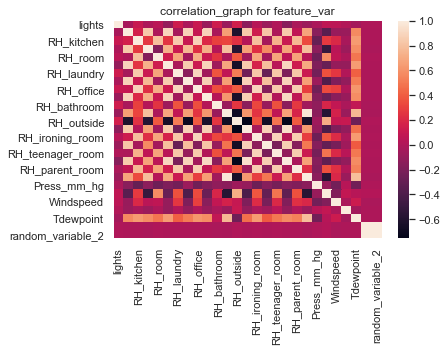

In [22]:
sns.set_style('whitegrid')
ax = sns.heatmap(feature_var.corr())

plt.title('correlation_graph for feature_var')
plt.show()

###### observation:
(1). All the temperature measurements recorded have strong positive correlation,so its reasonable to say they are good predictors.

(2). There are no significant correlation with the relative humidity measured inside the building, whereas that measured outside the building seem to have a negative correlation.

(3). The atmospheric weather temperature and Tdewpoint seem to have a low positive correlation whereas the likes of press_mm_hg, visibility,outside_RH have extremely low correlation .

(4). The random variables seem insignificant

###### Investigating the skewness of the features 

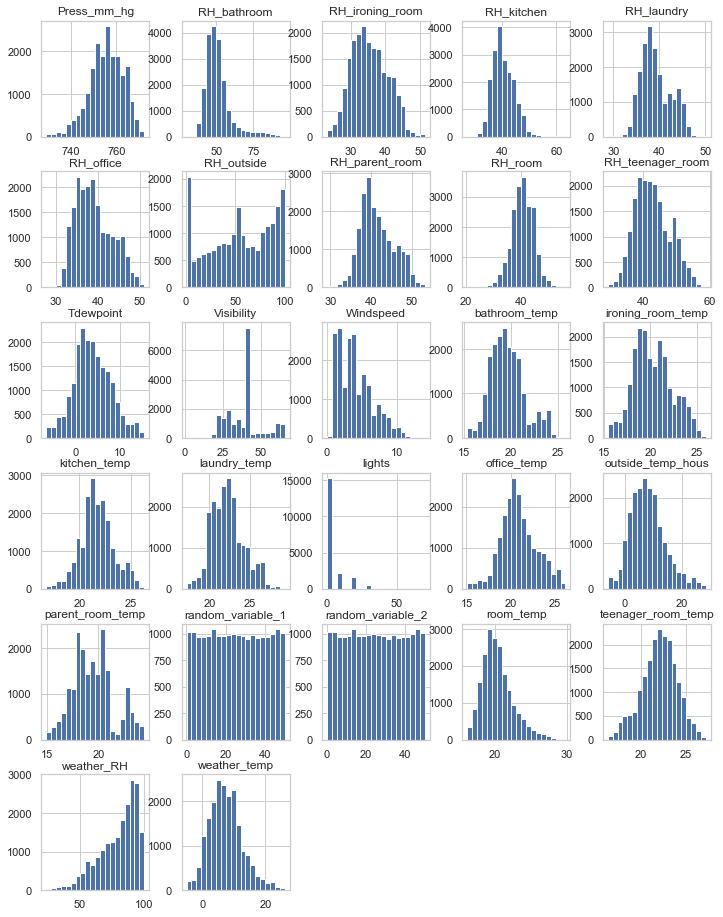

In [23]:
feature_var.hist(bins=20,figsize=(12,16))
plt.show()

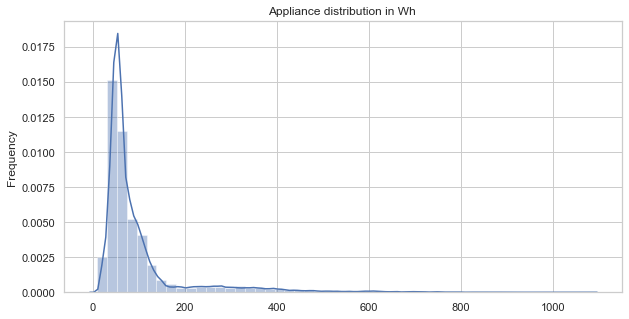

In [24]:
plt.figure(figsize =(10,5))
plt.title("Appliance distribution in Wh ")
plt.ylabel('Frequency')
ax = sns.distplot(target_var)
plt.show()

###### obseravtions:
-All the above plot seem to be normally distributed except for RH_out,rv1,rv2,light,and outside_RH(weather).Which does not have a bell shaped curve depicting irregular distribution of data

-The output variable is positively skewed,having a possible KDE of 100,indicating presence of outliers

### Task-4: Implementing the model
I intend to run aggregate analysis on my entire features using statsmodels.

In [25]:
from pandas import DataFrame
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [26]:

feature_var = sm.add_constant(feature_var)

est = sm.OLS(target_var,feature_var).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     149.7
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        07:53:18   Log-Likelihood:            -1.1760e+05
No. Observations:               19735   AIC:                         2.353e+05
Df Residuals:                   19708   BIC:                         2.355e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 50.2084     94

###### observations:
The table summary above, shows there are certain features that didnt fall within our level of confidence,which is a significant level of 0.05 as measured by the pvalue,ideally these fetured should be drop the model re-evaluated. The essence of running the statsmodel was to help us select the most important features that are significantly correlated with our target variable which is provided by the pvalue.

- rv1 and rv2 as we can see appear not have any correlation as they appear to be random values

- visibility and light columns will be dropped too despite meeting our condition,as they have so many outliers and add nothing to our analysis

- Kitchen_temp,RH_office, bathroom_temp will also be dropped as fail to meet our significant condition

- The feature variables were able to explain only 17% of variability on the target variable which is provided by the R2.

In [27]:
feature_var.drop(['Visibility','lights'], axis = 1, inplace = True)

###### sepearating my data into train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(feature_var,target_var,test_size=0.3,random_state=42)
### fitting the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
predictions = model.predict(x_test)

###### I intend to calculate my model performance using the following models;

- Mean Avaerage Error(MAE)
- Residual Sum of Squares(RSS)
- Root Mean Square Error(RMSE)
- R-Squared Score(R2)

In [30]:

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE_SCORE PERFORMANCE : {:.2f}'.format(mae))
round(mae, 3)
print('=============================================')


from sklearn.metrics import r2_score

r2_score = r2_score(y_test, predictions)
print('R2_SCORE PERFORMANCE : {:.2f}'.format(r2_score))
round(r2_score, 3)
print('===============================================')

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('RMSE_SCORE PERFORMANCE : {:.2f}'.format(rmse))
round(rmse,3)
print('================================================')

import numpy as np
RSS = np.sum(np.square(y_test-predictions))
print('RSS_SCORE PERFORMANCE:')
round(RSS, 3)

MAE_SCORE PERFORMANCE : 53.57
R2_SCORE PERFORMANCE : 0.15
RMSE_SCORE PERFORMANCE : 93.64
RSS_SCORE PERFORMANCE:


Appliances    5.192116e+07
dtype: float64

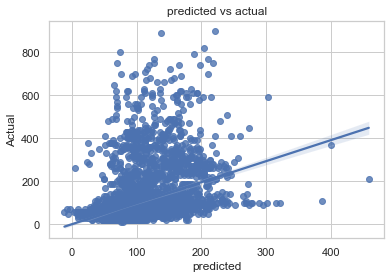

In [31]:
sns.regplot(predictions, y_test)

plt.title('predicted vs actual')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

###### observations:

from the above result we can clearly see that the model performed very poorly, compairing the R2 score with that of OLS R2,even with the feature reduction, our R2 model still did not perform well rather dropped by 3%, the independent variables did not attribute to the variability of the target variable.

###### Rescaling my data using the MinMaxScaler then evaluating the model

In [32]:
## concating my input and output variable for easy scaling

df1 = pd.concat([feature_var,target_var],axis=1)

In [33]:
df1.head(2)

,const,kitchen_temp,RH_kitchen,room_temp,RH_room,laundry_temp,RH_laundry,office_temp,RH_office,bathroom_temp,...,parent_room_temp,RH_parent_room,weather_temp,Press_mm_hg,weather_RH,Windspeed,Tdewpoint,random_variable_1,random_variable_2,Appliances
0,1.0,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,5.3,13.275433,13.275433,60
1,1.0,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,5.2,18.606195,18.606195,60


In [34]:
scaler = MinMaxScaler()
normalised_df = DataFrame(scaler.fit_transform(df1), columns=df1.columns)

In [35]:
target_df = DataFrame(normalised_df['Appliances'])
feature_df =normalised_df.drop(columns='Appliances',axis=1)

##### Training my scaled model

In [36]:
x_train,x_test,y_train,y_test = train_test_split(feature_df,target_df,test_size=0.3,random_state=42)

normalised_model = LinearRegression()
normalised_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
mormalised_pred = normalised_model.predict(x_test)

###### Measuring the performance of the fitted normalised dataset

In [38]:

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE PERFORMANCE : {:.2f}'.format(mae))
round(mae, 3)
print('==============================================')

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predictions)
print('R2_SCORE PERFORMANCE : {:.2f}'.format(r2_score))
round(r2_score, 3)
print('================================================')

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('RMSE PERFORMANCE: {:.2f}'.format(rmse))
round(rmse,3)
print('==================================================')

import numpy as np
RSS = np.sum(np.square(y_test-predictions))
print('RSS_SCORE PERFORMANCE:')
round(RSS, 3)

MAE PERFORMANCE : 98.81
R2_SCORE PERFORMANCE : -1263996.74
RMSE PERFORMANCE: 106.65
RSS_SCORE PERFORMANCE:


Appliances    6.734751e+07
dtype: float64

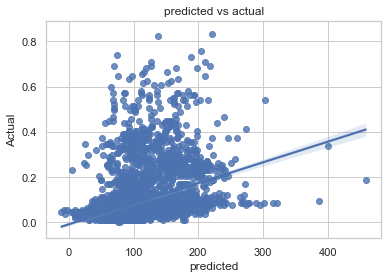

In [39]:
sns.regplot(predictions, y_test)

plt.title('predicted vs actual')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

###### observations:
the above plot and analysis shows that the scaled dataset was not able to improve our model and was not able to provide any linear relationship between our actual value and predicted value,as such it also shows their could be collinearity in our independent variables.

### Task-5 : Applying penalisation and Regularisation
With all the models we have tried so far,they all seem to perform poorly, now i intend to penalise my dataset by examining all features and reducing any form of overfitting.I will be testing the following models for my penalisation:
 
 - Ridge Regression
 - Linear Regression
 - Random Forest Regressor

In [40]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


###### Measuring the accuracy the models

In [42]:
 x_train,x_test,y_train,y_test=train_test_split(feature_df,target_df,test_size=0.3,random_state=1)
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
print('LinearReg_score: {:.2f}'.format(linear_reg.score(x_train,y_train)))
print('LinearReg_score: {:.2f}'.format(linear_reg.score(x_test,y_test)))
print('=========================================')

ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train,y_train)
print('Ridge_reg_score: {:.2f}'.format(ridge_reg.score(x_train,y_train)))
print('Ridge_Reg_score: {:.2f}'.format(ridge_reg.score(x_test,y_test)))
print('===========================================')

forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(x_train,y_train)
print('RandomForest_score: {:.2f}'.format(forest_model.score(x_train,y_train)))
print('RandomForest_score: {:.2f}'.format(forest_model.score(x_test,y_test)))

LinearReg_score: 0.14
LinearReg_score: 0.16
Ridge_reg_score: 0.14
Ridge_Reg_score: 0.16
RandomForest_score: 0.94
RandomForest_score: 0.55


In [46]:
## calculating the ridge  score for the quiz
ridge_pred=ridge_reg.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test,ridge_pred))
round(rmse,3)

0.088

###### observation:
The linear regression and the ridge regressor did not perform well on our data, as they were able to capture only a training accuracy of 14% and prediction accuracy of 16% which generally classified our model poor.
On the other hand, Random Forest was able to capture a training accuracy of 94% and a prediction accuracy of 55%, which looks okay for a good predicting model 

### Conclusion:

- The best model for this task owing to the series of steps is the Randomforest even though it can still be further fine tuned atleast to improve in the prediction accuracy
- Other models like the linear,ridge regression is not a good predictor for this task as they generally performed poorly in fitting well to our data
- It is also observed that feature reduction did not improve our model rather it dropped.